# Part 1

##  1.1. Load the datasets and packages

In [13]:
##Import all packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

## load the previously downloaded datasets

SO_2013 = pd.read_csv('C:\\Users\\Aleksa\\Documents\\Desktop\\Stackoverflow\\SO_2013.csv', encoding='latin-1')
SO_2018 = pd.read_csv('C:\\Users\\Aleksa\\Documents\\Desktop\\Stackoverflow\\SO_2018.csv',delimiter=',', encoding='latin-1')

## taking only the data for US
S0_2013=SO_2013.loc[SO_2013['What Country or Region do you live in?']=='United States of America']
S0_2018=SO_2018.loc[SO_2018['Country']=='United States']

C:\Users\Aleksa\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Aleksa\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1.2. Data Cleaning - Select the relevant columns fom both datasets

In [14]:

##Select the columns (Programming language, Ocupation and others) for both datasets and clean the data

SOC_2013=SO_2013[['What Country or Region do you live in?',\
         'How old are you?',\
         'Which of the following best describes your occupation?',\
         'Which of the following languages or technologies have you used significantly in the past year?',\
         'Unnamed: 57','Unnamed: 58','Unnamed: 59','Unnamed: 60','Unnamed: 61','Unnamed: 62','Unnamed: 63',\
         'Unnamed: 64','Unnamed: 65','Unnamed: 66','Unnamed: 67','Unnamed: 68','Unnamed: 69',\
         'Which technologies are you excited about?',\
         'Unnamed: 71','Unnamed: 72','Unnamed: 73','Unnamed: 74','Unnamed: 75','Unnamed: 76','Unnamed: 77',\
         'Unnamed: 78','Unnamed: 79','Unnamed: 80',\
         'Which desktop operating system do you use the most?',\
         'What best describes your career / job satisfaction?', \
         'Including bonus, what is your annual compensation in USD?'
        ]]

SOC_2013['languages'] = SOC_2013[SOC_2013.columns[3:16]].apply( lambda x: ';'.join(x.dropna().astype(str)),axis=1)

SOC_2018=SO_2018[['Country',\
        'Age',\
        'DevType',\
        'LanguageWorkedWith',\
        'LanguageDesireNextYear',\
        'OperatingSystem',\
        'JobSatisfaction',\
        'CareerSatisfaction',\
        'Currency','Salary','ConvertedSalary']]

C:\Users\Aleksa\ANACONDA\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 1.3. Data Cleaning - Making the functions and input data for plots

In [15]:
########################################## Extract all unique programming languages from the original data
possible_vals=[]
for i in SOC_2013['languages']:
    for j in str(i).split(';'):
        possible_vals.append(str(j))
possible_vals_2013=list(set(possible_vals))

possible_vals=[]
for i in SOC_2018['LanguageWorkedWith']:
    for j in str(i).split(';'):
        possible_vals.append(str(j))
possible_vals_2018=list(set(possible_vals))

possible_vals= list(set(possible_vals_2013) | set(possible_vals_2018))
possible_vals.remove('')
############################################ Extract all unique ocupation from the original data (not needed for the 2013 dataset)
dev_types=[]
for i in SOC_2018['DevType']:
    for j in str(i).split(';'):
        #print(j)
        dev_types.append(str(j))
dev_types=list(set(dev_types))
############################################ input function for the plotting function

def total_count(df, col1, col2, look_for):
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df
############################################ Plotting function for multi-column data
def clean_and_plot(df, column, name, title, listt, color,  plot=True):

    study = column.value_counts().reset_index()
    study.rename(columns={'index': name, name: 'count'}, inplace=True)
    study_df = total_count(study, name, 'count', listt)

    study_df.set_index(name, inplace=True)
   # plt.figure(figsize=(30,15))
    if plot:
        ((study_df/study_df.sum())*100).plot(kind='bar', color =color, figsize=(10,5),legend=None);
        plt.title(title);       
        plt.ylabel('%')
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

############################################ Plotting function for one-column data

def just_plot(df, column, name, title, color,  plot=True):

    study = column.value_counts()#.reset_index()
    study_sum=column.value_counts()
    study.rename(columns={'index': name, name: 'count'}, inplace=True)

    #plt.figure(figsize=(30,15))
    if plot:
        ((study/study_sum.sum())*100).plot(kind='bar', color =color, figsize=(10,5),legend=None);
        plt.title(title);
        plt.ylabel('%') 
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
    props_study_df = study/study_sum.sum()
    return props_study_df

## 1.4. Plot the Languages

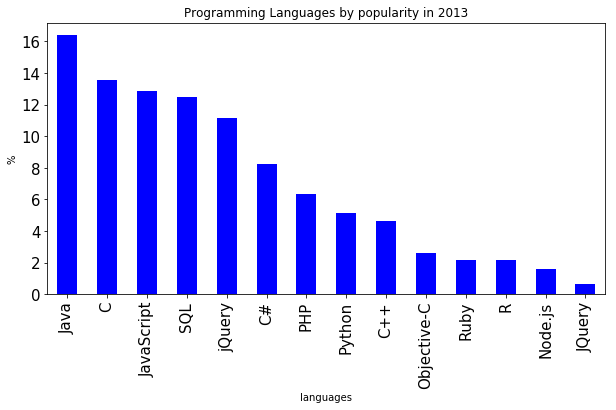

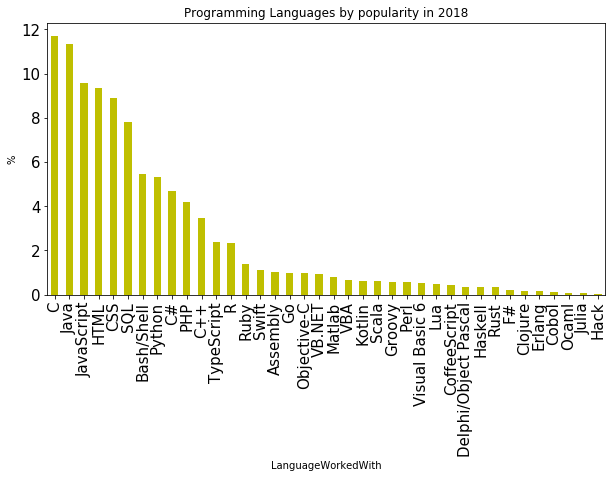

In [16]:
#PLOT LANGUAGES 
props_df = clean_and_plot(SOC_2013, SOC_2013['languages'], name='languages', title='Programming Languages by popularity in 2013', listt= possible_vals, color='b')
    
props_df = clean_and_plot(SOC_2018, SOC_2018['LanguageWorkedWith'], name='LanguageWorkedWith', title='Programming Languages by popularity in 2018', listt=possible_vals, color='y')

## 1.5. Plot the Ocupation

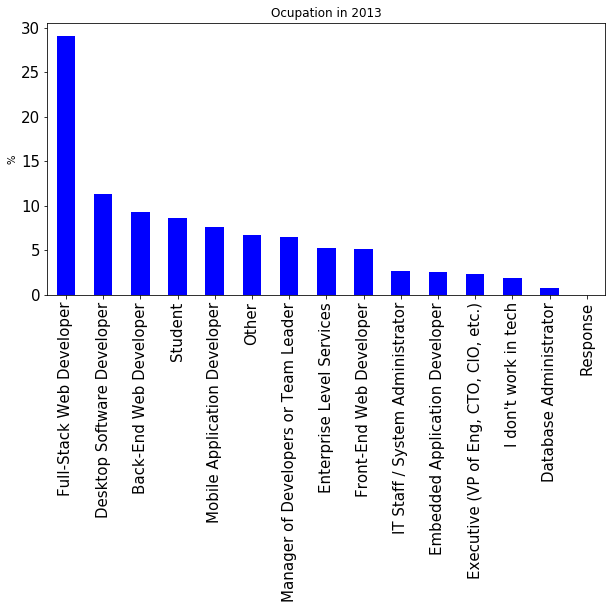

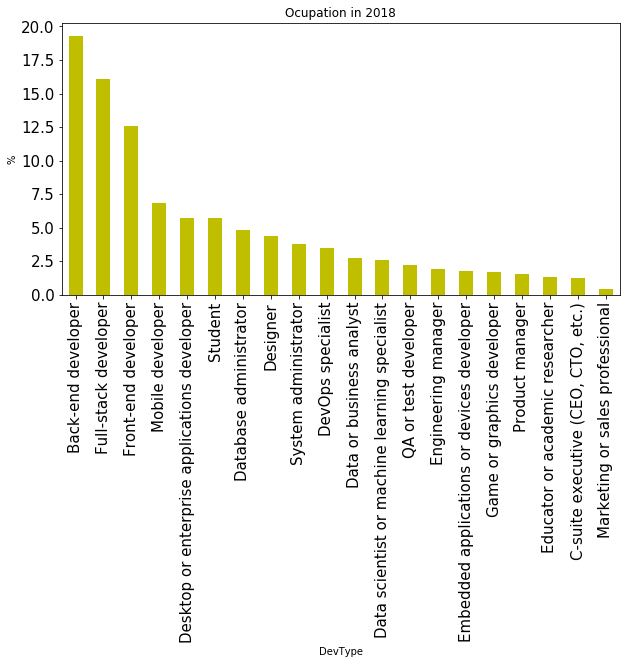

In [17]:
# PLOT OCUPATION
props_df = just_plot(SOC_2013, SOC_2013['Which of the following best describes your occupation?'], name='Which of the following best describes your occupation?', title='Ocupation in 2013', color='b')

props_df = clean_and_plot(SOC_2018, SOC_2018['DevType'], name='DevType', title='Ocupation in 2018', listt= dev_types, color='y')


# Part 2

## 2.1. Clean the Dataset - Preparation for Classification

In [18]:
# Select the 2018 dataset, only in US and for full_time employed
SOD=SO_2018.loc[(SO_2018['Employment']=='Employed full-time') & (SO_2018['Country']=='United States') & (SO_2018['ConvertedSalary'].notnull())]

In [19]:
# Select the important columns and map/replace their values for simplification (if categorical)
FOD=pd.DataFrame()

#SOD['OpenSource']=SOD['OpenSource']
#FOD['OpenSource']=SOD['OpenSource']
############################################################################
SOD['FormalEducation'].replace({'Associate degree': 'Associate',\
                               'Bachelorâ\x80\x99s degree (BA, BS, B.Eng., etc.)': 'BA',\
                               'Some college/university study without earning a degree': 'Pre-BA',\
                               'Masterâ\x80\x99s degree (MA, MS, M.Eng., MBA, etc.)': 'MA',\
                               'Other doctoral degree (Ph.D, Ed.D., etc.)':'PhD',\
                               'Professional degree (JD, MD, etc.)':'Pd',\
                               'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'SS',\
                               'I never completed any formal education':'No School',\
                               'Primary/elementary school':'Primary'}, inplace=True)
FOD['ForEdu']=SOD['ForEdu']=SOD['FormalEducation']
############################################################################
SOD['UndergradMajor'].replace({'Computer science, computer engineering, or software engineering':'CS',\
                               'Fine arts or performing arts (ex. graphic design, music, studio art)':'Fine Arts',\
                               'A social science (ex. anthropology, psychology, political science)':'SS',\
                               'Web development or web design':'WD',\
                               'Another engineering discipline (ex. civil, electrical, mechanical)':'Engineering',\
                               'A humanities discipline (ex. literature, history, philosophy)':'Humanities',\
                               'A natural science (ex. biology, chemistry, physics)':'NS',\
                               'Mathematics or statistics':'Math',\
                               'A business discipline (ex. accounting, finance, marketing)':'Business',\
                               'Information systems, information technology, or system administration':'IT',\
                               'A health science (ex. nursing, pharmacy, radiology)':'Health',\
                               'I never declared a major':'No Major'}, inplace=True)
FOD['UnderMaj']=SOD['UnderMaj']=SOD['UndergradMajor']
############################################################################
SOD['CompanySize'] = SOD['CompanySize'].str.replace(' employees', '')
FOD['CompanySize']=SOD['CompanySize']
############################################################################ special mapping for mutli-column variables
dev_type=[]
for i in SOD['DevType']:
    for j in str(i).split(';'):
        #print(j)
        dev_type.append(str(j))
devv=list(set(dev_type))

devv=['Marketing or sales professional',\
 'System administrator',\
 'Student',\
 'Game or graphics developer',\
 'Database administrator',\
 'Data or business analyst',\
 'DevOps specialist',\
 'Designer',\
 'Embedded applications or devices developer',\
 'Data scientist or machine learning specialist',\
 'Engineering manager',\
 'Full-stack developer',\
 'Mobile developer',\
 'Educator or academic researcher',\
 'Front-end developer',\
 'Desktop or enterprise applications developer',\
 'nan',\
 'Product manager',\
 'QA or test developer',\
 'C-suite executive',\
 'Back-end developer']

for i in devv:
    FOD[i]=SOD[i]=SOD['DevType'].str.contains(i)
    FOD[i]=SOD[i].replace({True:1, False:0}, inplace=True)
    

############################################################################
SOD['YearsCoding'].replace({'0-2 years':1,'3-5 years':4,'6-8 years':7,'9-11 years':10,'12-14 years':13, '15-17 years':16,'18-20 years':19,'21-23 years':22,'24-26 years':25, '27-29 years':28, '30 or more years':30 }, inplace=True)
SOD['YearsCodingProf'].replace({'0-2 years':1,'3-5 years':4,'6-8 years':7,'9-11 years':10,'12-14 years':13, '15-17 years':16,'18-20 years':19,'21-23 years':22,'24-26 years':25, '27-29 years':28, '30 or more years':30 }, inplace=True)

FOD['YearsCoding']=SOD['YearsCoding']
FOD['YearsCodingProf']=SOD['YearsCodingProf']
############################################################################
SOD['UpdateCV'].replace({'My job status or other personal status changed':'Job change',\
                       'I had a negative experience or interaction at work':'Bad Company',\
                       'A recruiter contacted me':'Recruiter', \
                       'A friend told me about a job opportunity':'Opportunity',\
                       'I saw an employerâ\x80\x99s advertisement':'Add',\
                       'I received bad news about the future of my company or department':'Bad News',\
                       'I received negative feedback on my job performance':'Bad Review',\
                       'I did not receive an expected change in compensation':'Low Salary'
                        
                       }, inplace=True)

FOD['UpdateCV']=SOD['UpdateCV']
########################################################################## special mapping for mutli column variables
edu_type=[]
for i in SOD['EducationTypes']:
    for j in str(i).split(';'):
        #print(j)
        edu_type.append(str(j))
eduu=list(set(edu_type))
eduu.sort()
                                                                
eduu=['Completed an industry certification program',\
 'Contributed to open source software',\
 'Participated in a full-time developer training program or bootcamp',\
 'Participated in a hackathon',\
 'Participated in online coding competitions',\
 'Received on-the-job training in software development',\
 'Taken a part-time in-person course in programming or software development',\
 'Taken an online course in programming or software development',\
 'Taught yourself a new language, framework, or tool without taking a formal course',\
 'nan']

for i in eduu:
    FOD[i]=SOD[i]=SOD['EducationTypes'].str.contains(i)
    FOD[i]=SOD[i].replace({True:1, False:0}, inplace=True)

gg=['EDU_certification', 'EDU_open source', 'EDU_full-time training', 'EDU_hackathon', 'EDU_coding competitions', 'EDU_on-the-job training','EDU_part-time course','EDU_online course','EDU_self-taught','nan']

for i, j in zip(eduu, gg):
    SOD.rename(columns={i:j}, inplace=True)
    FOD.rename(columns={i:j}, inplace=True)
############################################################################ take care of special characters when making new columns
SOD['LanguageWorkedWith'] = SOD['LanguageWorkedWith'].str.replace('\+', 'plus')
SOD['LanguageWorkedWith'] = SOD['LanguageWorkedWith'].str.replace('\#', 'sharp')
SOD['LanguageWorkedWith'] = SOD['LanguageWorkedWith'].str.replace('\/', ' ')


language_type=[]
for i in SOD['LanguageWorkedWith']:
    for j in str(i).split(';'):
        #print(j)
        language_type.append(str(j))
language_type=list(set(language_type))


#language_type = [item.replace('#', 'sharp') for item in language_type]
#language_type = [item.replace('/', ' ') for item in language_type]
#language_type = [item.replace('++', 'plusplus') for item in language_type]


for i in language_type:
    FOD[i]=SOD[i]=SOD['LanguageWorkedWith'].str.contains(i)
    FOD[i]=SOD[i].replace({True:1, False:0}, inplace=True)
############################################################################
SOD['LanguagesCount'] = SOD['LanguageWorkedWith'].apply(lambda x: len(str(x).split(';')))
FOD['LanguagesCount']=SOD['LanguagesCount']
############################################################################

SOD['OperatingSystem']=SOD['OperatingSystem']
FOD['OperatingSystem']=SOD['OperatingSystem']
############################################################################

vers_control=[]
for i in SOD['VersionControl']:
    for j in str(i).split(';'):
        #print(j)
        vers_control.append(str(j))
vers_control=list(set(vers_control))

for i in vers_control:
    FOD[i]=SOD[i]=SOD['VersionControl'].str.contains(i)
    FOD[i]=SOD[i].replace({True:1, False:0}, inplace=True)
############################################################################

SOD['StackOverflowVisit'].replace({'Multiple times per day':5, 'A few times per month or weekly':2,
   'Daily or almost daily':4, 'A few times per week':3,
   'Less than once per month or monthly':1, 'nan':None,
   'I have never visited Stack Overflow (before today)':0 }, inplace=True)
FOD['StackOverflowVisit']=SOD['StackOverflowVisit']
############################################################################
SOD['WakeTime'].replace({'Between 9:01 - 10:00 AM':9, 'Between 8:01 - 9:00 AM':8,\
                                   'Between 7:01 - 8:00 AM':7,  'Between 6:01 - 7:00 AM':6, 'Between 5:00 - 6:00 AM':5,\
                                   'Before 5:00 AM':4,  'Between 10:01 - 11:00 AM':10,'nan':None, 'Between 11:01 AM - 12:00 PM':11,\
                                   'After 12:01 PM':13, 'Between 11:01 AM - 12:00 PM':11,  'I do not have a set schedule':None,\
                                   'I work night shifts':None},inplace=True)

FOD['WakeTime']=SOD['WakeTime']
############################################################################
SOD['HoursComputer'].replace({'Over 12 hours':12,'9 - 12 hours':10,'5 - 8 hours':7,\
                        '1 - 4 hours':3, 'Less than 1 hour':1, 'nan':None},inplace=True)
                                   
FOD['HoursComputer']=SOD['HoursComputer']=SOD['HoursComputer'].convert_objects(convert_numeric=True)                   
############################################################################
SOD['HoursOutside'].replace({'Over 4 hours':4,'3 - 4 hours':3,'1 - 2 hours':2,\
                             '30 - 59 minutes':1, 'Less than 30 minutes':0.5, 'nan':None},inplace=True)
FOD['HoursOutside']=SOD['HoursOutside']=SOD['HoursOutside'].convert_objects(convert_numeric=True)                                     
############################################################################
SOD['SkipMeals'].replace({'1 - 2 times per week':1,'Daily or almost every day':3,'Never':0,\
                             '3 - 4 times per week':2, 'nan':None},inplace=True)

FOD['SkipMeals']=SOD['SkipMeals']=SOD['SkipMeals'].convert_objects(convert_numeric=True)   
############################################################################
SOD['Exercise'].replace({"I don't typically exercise":0,"Daily or almost every day":6,\
                             "3 - 4 times per week":4, "1 - 2 times per week":2,'nan':None},inplace=True)  

FOD['Exercise']=SOD['Exercise']=SOD['Exercise'].convert_objects(convert_numeric=True)   
############################################################################                                   

SOD['Age'].replace({'18 - 24 years old':22,'35 - 44 years old':40,'45 - 54 years old':50,\
                    '25 - 34 years old':30, '55 - 64 years old':60, '65 years or older':65,\
                    'Under 18 years old':18,'nan':None},inplace=True)
FOD['Age']=SOD['Age']=SOD['Age'].convert_objects(convert_numeric=True)   
############################################################################  

FOD['ConvertedSalary']=SOD['ConvertedSalary']=SOD['ConvertedSalary'].convert_objects(convert_numeric=True)   

############################################################################ 

FOD=SOD[list(FOD.columns)]
FOD.drop(['nan'], axis=1, inplace=True)


for i in FOD.columns:
    FOD[i]=FOD[i].fillna((FOD[i].mode()[0]))
#FOD=FOD.dropna()

C:\Users\Aleksa\ANACONDA\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Aleksa\ANACONDA\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Aleksa\ANACONDA\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

C:\Users\Aleksa\ANACONDA\lib\site-packages\ipykernel_launcher.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 2.2 Final cleaning, one-hot encoding and standardizing

In [20]:
## Make dummy variables for the rest of the categorical columns

FOD_d=pd.get_dummies(FOD)
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 200)


## Map the Salary column into bins:0-50K, 50-100K, ...
bins = [0, 50000, 100000, 150000, 200000, 250000, 350000, 500000, 1000000, 2000000]
labels =[50, 100, 150, 200, 250, 350, 500, 1000, 2000]


FOD_d['SalaryBins'] = pd.cut(FOD_d['ConvertedSalary'], bins,labels=labels)
FOD_d =FOD_d.dropna()

## Define the X and y 
y=FOD_d['SalaryBins']
X=FOD_d.drop(['ConvertedSalary', 'SalaryBins'], axis=1)


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Aleksa\ANACONDA\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aleksa\ANACONDA\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aleksa\ANACONDA\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


## 2.3. Run the Model

In [21]:
# Random Forest CLassifier
model = RandomForestClassifier(n_estimators=100,max_depth=500,min_samples_leaf=20, min_samples_split= 100)
model.fit(X_train, y_train)

# 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Accuracy and F-score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

print('Fscore:' ,f1_score(y_test, y_test_pred, average='weighted') )

The training accuracy is 0.5911860718171926
The test accuracy is 0.5791993037423847
Fscore: 0.5144086903813296


C:\Users\Aleksa\ANACONDA\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 2.4. Factor Significance

In [23]:
# Factor Significance
a=list(X.columns)
b=list(model.feature_importances_)
list_of_tuples = list(zip(a, b)) 
df = pd.DataFrame(list_of_tuples, columns = ['Feature', 'Importance']) 
df.sort_values(by=['Importance'], ascending=False, inplace=True)
  
df.style.bar(subset=['Importance'], align='mid', color=['#5fba7d'])

,Feature,Importance
21,YearsCodingProf,0.226143
20,YearsCoding,0.172696
83,Age,0.0758585
124,OperatingSystem_Windows,0.0365015
10,Engineering manager,0.0337181
123,OperatingSystem_MacOS,0.0289341
23,EDU_open source,0.0279144
25,EDU_hackathon,0.016293
37,PHP,0.0157951
69,LanguagesCount,0.0132929


In [99]:
# Job Position vs Salary

devv=['Marketing or sales professional','System administrator','Student','Game or graphics developer','Database administrator',\
      'Data or business analyst', 'DevOps specialist','Designer','Embedded applications or devices developer',\
      'Data scientist or machine learning specialist','Engineering manager','Full-stack developer',\
      'Mobile developer','Educator or academic researcher','Front-end developer','Desktop or enterprise applications developer',\
      'Product manager','QA or test developer','C-suite executive','Back-end developer']


ggg=[]
ddd=[]

for i in devv:
    ss=FOD_d['ConvertedSalary'].loc[FOD_d[i]==1]
    ss=ss.astype(int)
    #print(i, ss.mean())#, ss.mean() )
    ggg.append(i)
    ddd.append(ss.mode().mean())

list_lang = list(zip(ggg, ddd)) 
dff = pd.DataFrame(list_lang, columns = ['Position', 'Salary']) 
dff.sort_values(by=['Salary'], ascending=False, inplace=True)
  
dff.style.bar(subset=['Salary'], align='mid', color=['#5fba7d'])

,Position,Salary
10,Engineering manager,150000
16,Product manager,125000
6,DevOps specialist,120000
13,Educator or academic researcher,120000
9,Data scientist or machine learning specialist,120000
19,Back-end developer,120000
3,Game or graphics developer,120000
15,Desktop or enterprise applications developer,110000
5,Data or business analyst,100000
1,System administrator,100000


In [94]:
#Languages Used vs Salary
ggg=[]
ddd=[]

for i in ['Ocaml','Bash Shell', 'Go', 'Clojure', 'Java', 'Assembly', 'PHP', 'CSS','Python', 'Csharp', 'Matlab',\
          'Lua', 'Fsharp', 'Julia', 'Cplusplus','Objective-C', 'Haskell', 'VB.NET', 'Swift', 'Visual Basic 6', 'Kotlin',\
          'Groovy', 'TypeScript', 'C', 'SQL', 'Hack', 'Erlang', 'CoffeeScript','Ruby', 'Rust', 'VBA', 'Delphi Object Pascal',\
          'R', 'Perl','JavaScript', 'Scala', 'HTML', 'Cobol']:
    ss=FOD_d['ConvertedSalary'].loc[FOD_d[i]==1]
    ss=ss.astype(int)
    #print(i, ss.mean())#, ss.mean() )
    ggg.append(i)
    ddd.append(ss.mode().mean())

list_lang = list(zip(ggg, ddd)) 
dff = pd.DataFrame(list_lang, columns = ['Language', 'Salary']) 
dff.sort_values(by=['Salary'], ascending=False, inplace=True)
  
dff.style.bar(subset=['Salary'], align='mid', color=['#5fba7d'])

,Language,Salary
25,Hack,150000
16,Haskell,150000
3,Clojure,150000
5,Assembly,150000
31,Delphi Object Pascal,150000
29,Rust,140000
24,SQL,120000
22,TypeScript,120000
34,JavaScript,120000
8,Python,120000


# other code - disregard

In [ ]:
#GET DUMMIES
#TRAIN TEST SPLIT
#Normlize/Standardize
#Regression
# Fscore

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(X.iloc[:,0:1], annot=True, linewidths=.5, ax=ax, fmt=".2f")

#SO_2018=SO_2018.dropna()
#plt.scatter(S0_2018['YearsCodingProf'],S0_2018['ConvertedSalary'], edgecolor='k')
#ax.scatter(df["title_year"],df["gross"], color='pink')


X_train=X_train.to_numpy().reshape(-1, 1)
y_train=y_train.to_numpy().reshape(-1, 1)
X_test=X_test.to_numpy().reshape(-1, 1)
y_test.to_numpy().reshape(-1, 1)

#model = RandomForestRegressor(n_estimators=100,max_depth=500,min_samples_leaf=20, min_samples_split= 100)
#model = LinearRegression(normalize=True)#fit_intercept=False, normalize=True, copy_X=True, n_jobs=None)
#ada=AdaBoostClassifier()
#r2_train=r2_score(y_train, y_train_pred)
#r2_test=r2_score(y_test, y_test_pred)
#print('The training r_squared', r2_train)
#print('The test r_squared', r2_test)



cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]


def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):

    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [ ]:


cutoffs = [1,10, 20, 50, 80, 100, 150, 500, 1000, 2000, 20000]

num_feats, results = [], []
for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size =0.2, random_state=42)

        #model = RandomForestClassifier(n_estimators=100,max_depth=500,min_samples_leaf=20, min_samples_split= 100)
        #model = RandomForestRegressor(n_estimators=100,max_depth=500,min_samples_leaf=20, min_samples_split= 100)

        model.fit(X_train, y_train)



        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

  
        #train_accuracy = accuracy_score(y_train, y_train_pred)
        #test_accuracy = accuracy_score(y_test, y_test_pred)
        #print('The training accuracy is', train_accuracy)
        #print('The test accuracy is', test_accuracy)
        
        r2_train=r2_score(y_train, y_train_pred)
        r2_test=r2_score(y_test, y_test_pred)
        print('The training r_squared', r2_train)
        print('The test r_squared', r2_test)

In [ ]:
#FOD['ConvertedSalary']
column=[]
percentage=[]
for i in FOD.columns:
    percentage.append(FOD[i].isnull().sum()/len(FOD) )
    column.append(i)
        
column = pd.Series(column)
percentage=pd.Series(percentage)
nan_percentage=pd.concat([column,percentage], axis=1).reset_index()
nan_percentage=nan_percentage.iloc[:,1:]
nan_percentage.rename(columns={ nan_percentage.columns[0]: "Column Name" }, inplace = True)
nan_percentage.rename(columns={ nan_percentage.columns[1]: "% of NaN" }, inplace = True)
nan_percentage.sort_values(['% of NaN'], ascending=False)


ff=FOD['ConvertedSalary']#.replace(np.nan, '1000000')
#plt.figsize=(15,8)
ff.plot(kind='hist', bins=50, color ='b', figsize=(10,5),legend=None);
#plt.hist(ff, bins=50, figsize=(15,8))
plt.title(str(i))
plt.show()



In [ ]:
#pd.cut(FOD['ConvertedSalary'], bins=3, labels=np.arange(3), right=False)